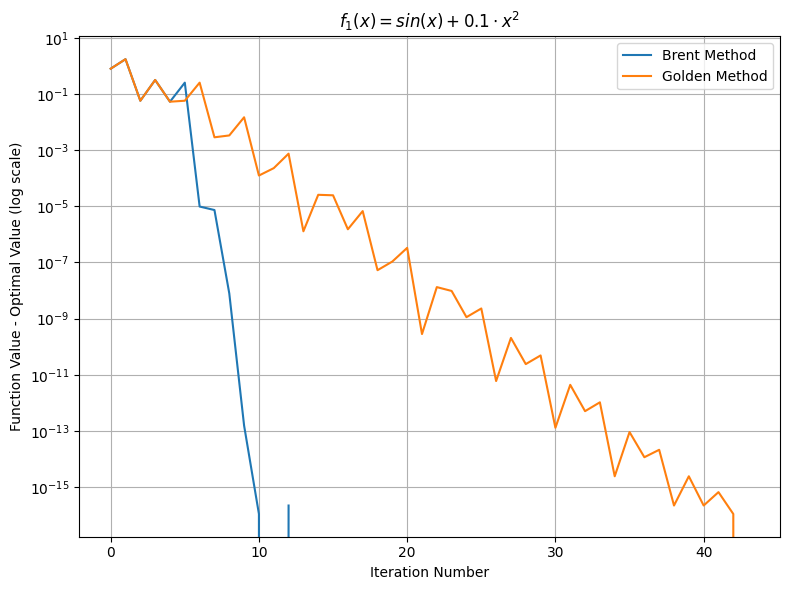

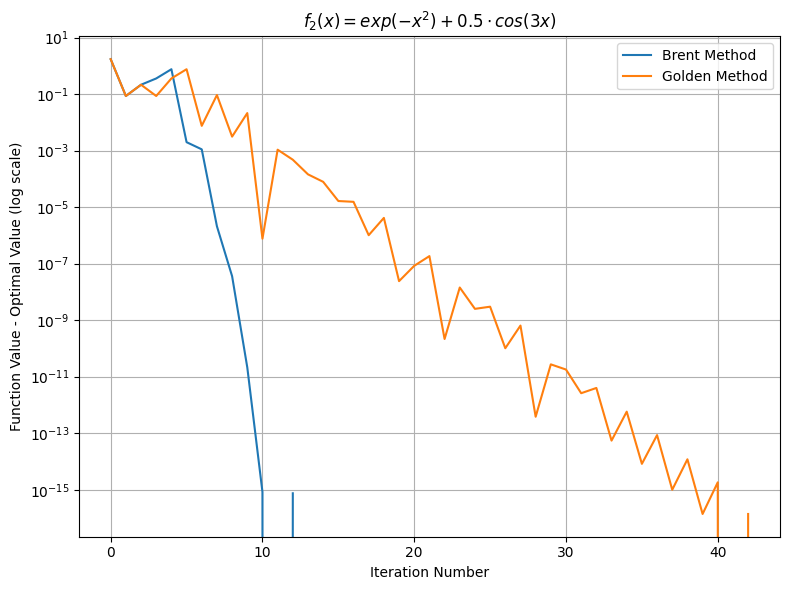

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define two test functions
def f1(x):
    return np.sin(x) + 0.1 * (x ** 2)

def f2(x):
    return np.exp(-x**2) + 0.5 * np.cos(3 * x)

# Optimization settings
methods = ['brent', 'golden']
functions = [f1, f2]
function_names = [r'$f_1(x) = sin(x) + 0.1 \cdot x^2$', r'$f_2(x) = exp(-x^2) + 0.5 \cdot cos(3x)$']

# Store results for plotting
results = {}

for func, func_name in zip(functions, function_names):
    results[func_name] = {}
    for method in methods:
        function_call_values = []

        # Wrap the function to track calls
        def wrapped_func(x):
            value = func(x)
            function_call_values.append(value)
            return value

        result = minimize_scalar(wrapped_func, method=method)

        # Collect data for plotting
        results[func_name][method] = {
            'function_values': function_call_values,
            'num_calls': len(function_call_values),
            'x_min': result.x,
            'fun_min': result.fun
        }

# Plot results
for func_name in function_names:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    # Plot function value vs. iteration number
    for method in methods:
        ax.plot(
            range(len(results[func_name][method]['function_values'])),
            [fv - results[func_name][method]['fun_min'] for fv in results[func_name][method]['function_values']],
            label=f'{method.capitalize()} Method'
        )
    ax.set_yscale('log')
    ax.set_title(func_name)
    ax.set_xlabel('Iteration Number')
    ax.set_ylabel('Function Value - Optimal Value (log scale)')
    ax.legend()
    ax.grid()

    plt.tight_layout()
    plt.show()
